In [30]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
cols = ['sentiment','id','date','query_string','user','text']
df = pd.read_csv("../input_data/data.csv", names=cols)
df.head()

,sentiment,id,date,query_string,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [31]:
df['pre_clean_len'] = [len(t) for t in df.text]

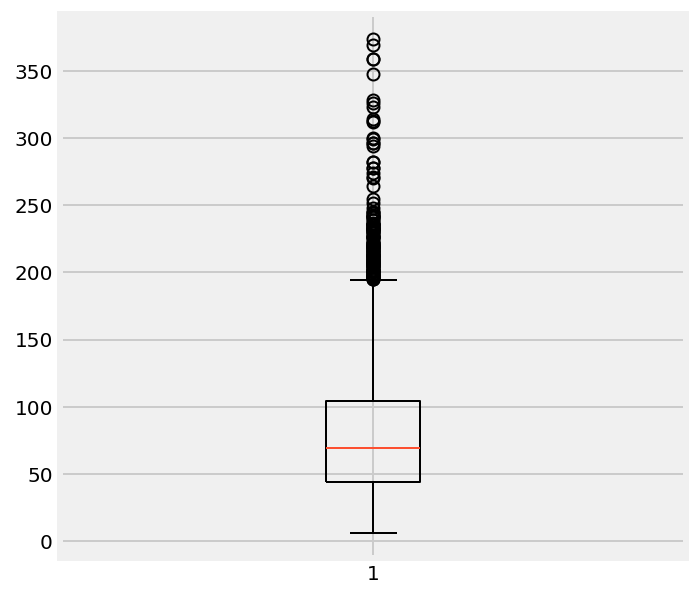

In [32]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.boxplot(df.pre_clean_len)
plt.show()

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 4 columns):
sentiment        1600000 non-null int64
text             1600000 non-null object
processed        1600000 non-null object
pre_clean_len    1600000 non-null int64
dtypes: int64(2), object(2)
memory usage: 48.8+ MB


In [6]:
df.sentiment.value_counts()

4    800000
0    800000
Name: sentiment, dtype: int64

In [7]:
df.drop(['id','date','query_string','user'],axis=1,inplace=True)

In [8]:
df[df.sentiment == 0].head(10)

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
5,0,@Kwesidei not the whole crew
6,0,Need a hug
7,0,@LOLTrish hey long time no see! Yes.. Rains a...
8,0,@Tatiana_K nope they didn't have it
9,0,@twittera que me muera ?


In [9]:
df[df.sentiment == 4].head(10)

,sentiment,text
800000,4,I LOVE @Health4UandPets u guys r the best!!
800001,4,im meeting up with one of my besties tonight! ...
800002,4,"@DaRealSunisaKim Thanks for the Twitter add, S..."
800003,4,Being sick can be really cheap when it hurts t...
800004,4,@LovesBrooklyn2 he has that effect on everyone
800005,4,@ProductOfFear You can tell him that I just bu...
800006,4,@r_keith_hill Thans for your response. Ihad al...
800007,4,"@KeepinUpWKris I am so jealous, hope you had a..."
800008,4,"@tommcfly ah, congrats mr fletcher for finally..."
800009,4,@e4VoIP I RESPONDED Stupid cat is helping me ...


In [11]:
from porter_stemmer import PorterStemmer
from bs4 import BeautifulSoup
import re
import string
from sklearn.feature_extraction import stop_words

def processTweet(tweet):
    # decode HTML special entities (e.g. &amp;)
    soup = BeautifulSoup(tweet, 'lxml')
    tweet = soup.get_text()
    #remove @username
    tweet = re.sub('@[^\s]+','',tweet)
    # Remove tickers
    tweet = re.sub(r'\$\w*', '', tweet)
    # To lowercase
    tweet = tweet.lower()
    # Remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*\/\w*', '', tweet)
    # Remove hashtags
    tweet = re.sub(r'#\w*', '', tweet)
    # Remove Punctuation and split 's, 't, 've with a space for filter
    tweet = re.sub(r'[' + string.punctuation.replace('@', '') + ']+', ' ', tweet)
    # Remove words with 2 or fewer letters
    tweet = re.sub(r'\b\w{1,2}\b', '', tweet)
    # Remove whitespace (including new line characters)
    tweet = re.sub(r'\s\s+', ' ', tweet)
    tweet = re.sub(' +', ' ',tweet)
    # Remove single space remaining at the front of the tweet.
    tweet = tweet.lstrip(' ')  
    # Removing Stopwords from tweet using sklearn.feature_extraction
    split_list = tweet.split(" ")
    tweet = [ word for word in split_list if word not in stop_words.ENGLISH_STOP_WORDS ]
    # Stemming the 
    ps = PorterStemmer()
    tweet = [ ps.stem(word) for word in tweet ] 
    tweet = ' '.join(tweet)
    return tweet


print "Cleaning and parsing the tweets...\n"
processed_data = list()
i = 0
for index, row in df.iterrows():
    if( (i+1)%10000 == 0 ):
        print "Tweets %d of %d has been processed" % ( i+1, df.shape[0])
    i += 1
    processed_data.append(processTweet(row['text']))

print processed_data

Cleaning and parsing the tweets...

Tweets 10000 of 1600000 has been processed
Tweets 20000 of 1600000 has been processed
Tweets 30000 of 1600000 has been processed
Tweets 40000 of 1600000 has been processed
Tweets 50000 of 1600000 has been processed
Tweets 60000 of 1600000 has been processed
Tweets 70000 of 1600000 has been processed
Tweets 80000 of 1600000 has been processed
Tweets 90000 of 1600000 has been processed
Tweets 100000 of 1600000 has been processed
Tweets 110000 of 1600000 has been processed
Tweets 120000 of 1600000 has been processed
Tweets 130000 of 1600000 has been processed
Tweets 140000 of 1600000 has been processed
Tweets 150000 of 1600000 has been processed
Tweets 160000 of 1600000 has been processed
Tweets 170000 of 1600000 has been processed
Tweets 180000 of 1600000 has been processed
Tweets 190000 of 1600000 has been processed
Tweets 200000 of 1600000 has been processed
Tweets 210000 of 1600000 has been processed
Tweets 220000 of 1600000 has been processed
Tweet

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [18]:
df['processed'] = [i.encode('utf-8') for i in processed_data]
df.head()

,sentiment,text,processed
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",awww bummer shoulda got david carr dai
1,0,is upset that he can't update his Facebook by ...,upset updat facebook tex result school todai b...
2,0,@Kenichan I dived many times for the ball. Man...,dive time ball manag save rest bound
3,0,my whole body feels itchy and like its on fire,bodi feel itchi like
4,0,"@nationwideclass no, it's not behaving at all....",behav mad


In [21]:
from sklearn.model_selection import train_test_split
X = df['processed']
Y = df['sentiment']
X_train_val, X_test , Y_train_val, Y_test = train_test_split(X,Y,test_size=0.2)
X_train, X_val, Y_train, Y_val = train_test_split(X_train_val,Y_train_val,test_size=0.25)

In [25]:
train_df = pd.concat([X_train, Y_train],axis='columns').reset_index(drop=True)
train_df.head()
train_df.to_csv("../input_data/train_df.csv", sep=',',index=False,encoding='utf-8')

In [33]:
validation_df = pd.concat([X_val, Y_val],axis='columns').reset_index(drop=True)
validation_df.to_csv("../input_data/validation_df.csv", sep=',',index=False,encoding='utf-8')

In [34]:
test_df = pd.concat([X_test, Y_test],axis='columns').reset_index(drop=True)
test_df.to_csv("../input_data/test_df.csv", sep=',',index=False,encoding='utf-8')